In [1]:
import pandas as pd
df=pd.read_csv("customer_shopping_behavior.csv")

# Bussiness problem $ Objectives 

**Objective:** To identify high-value customer segments and understand the drivers behind purchase frequency and spending to optimize marketing spend.

**Key Performance Indicators (KPIs):** Average Order Value (AOV), Customer Lifetime Value (CLV) proxy, and Churn Risk (based on purchase frequency).

In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Preparation & Initial Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [5]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [6]:
df['Review Rating']=df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_17892\701455774.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_17892\701455774.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Purchase Amount (USD)', estimator='mean', palette='magma')


Text(0.5, 1.0, 'Average Spend by Gender')

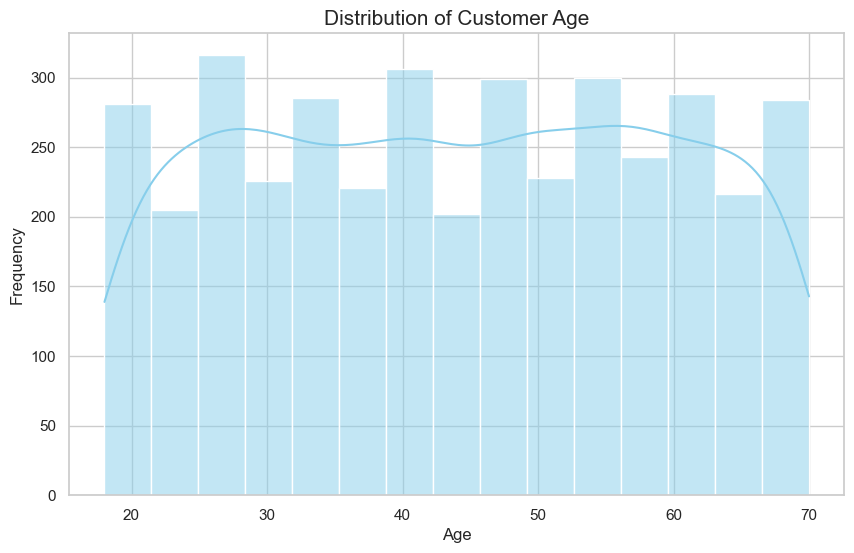

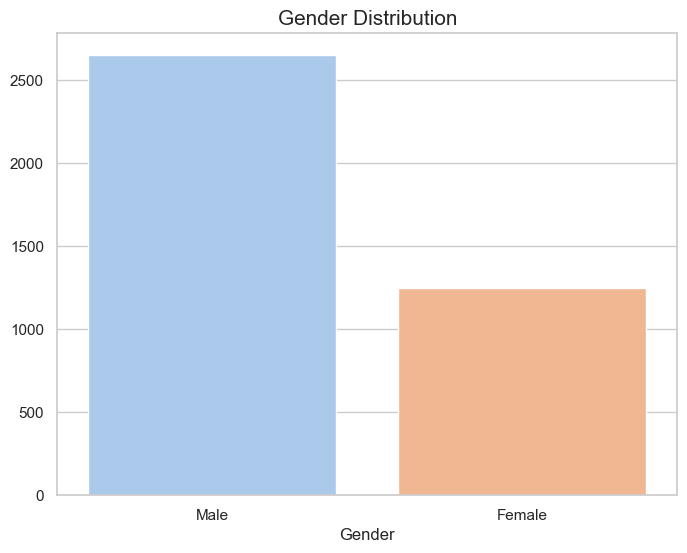

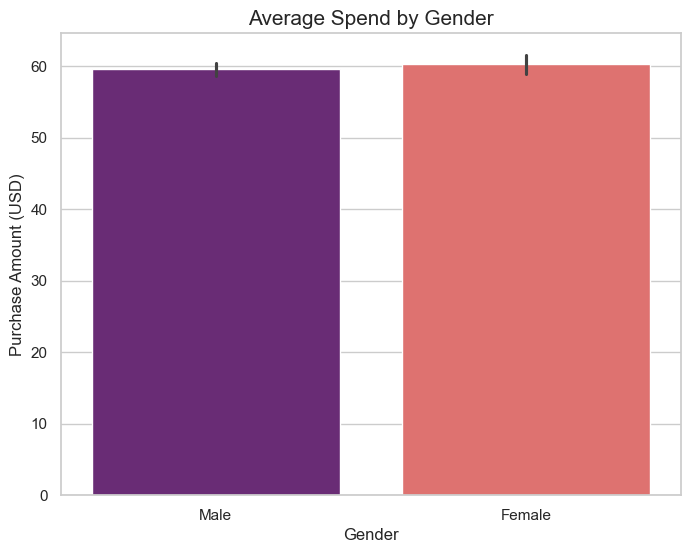

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the visual style for a professional look
sns.set_theme(style="whitegrid")

# 1. Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Customer Age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency')


# 2. Gender Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution', fontsize=15)


# 3. Average Purchase Amount by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Purchase Amount (USD)', estimator='mean', palette='magma')
plt.title('Average Spend by Gender', fontsize=15)


In [9]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.rename(columns={'purchase_amount_(usd)':'purchase_amount'}, inplace=True) 

In [10]:

df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [11]:
#create a column age_group
labels=['Young Adult','Adult','Middle-aged','Senior' ]
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)

In [12]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [13]:
# create column purchase_frequency_days
frequency_mapping={
    'Fortnightly' : 14,
    'Weekly' : 7,
    'Monthly' : 30,
    'Bi-Weekly' : 14,
    'Annually' : 365,
    'Every 3 Months' : 90,
    'Quarterly' : 90
    
}
df['purchase_frequency_days']=df['frequency_of_purchases'].map(frequency_mapping)

In [14]:
df[['purchase_frequency_days','frequency_of_purchases']]


,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
...,...,...
3895,7,Weekly
3896,14,Bi-Weekly
3897,90,Quarterly
3898,7,Weekly


In [15]:
df['purchase_frequency_days'].isnull().sum()


np.int64(0)

In [16]:
# check for discounts without promo code
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [17]:
(df['discount_applied']== df['promo_code_used']).all()

np.True_

In [18]:
df= df.drop('promo_code_used',axis=1)

In [19]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [20]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


# Connecting database

In [21]:
from sqlalchemy import create_engine
# connecting to postgresql
username ='aibuddyuser'
database ='customer_behaviour'
host = 'localhost'
port ='5432'
password ='insha123'
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
# Load dataframe into postgresql
table_name ='customer'
df.to_sql(table_name,engine,if_exists="replace",index=False)
print(f'Data successfully loaded into table {table_name} in database {database}')

Data successfully loaded into table customer in database customer_behaviour
